In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [17]:
df = pd.read_csv("./data/heart_2022_no_nans.csv")
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [18]:
# number of rows / columns
df.shape

(246022, 40)

In [19]:
# columns
df.columns, len(df.columns)

(Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
        'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
        'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
        'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
        'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
        'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
        'DifficultyConcentrating', 'DifficultyWalking',
        'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
        'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
        'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
        'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
        'HighRiskLastYear', 'CovidPos'],
       dtype='object'),
 40)

In [20]:
# describe categorical
df.describe(include="object")

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,246022,246022,246022,246022,246022,246022,246022,246022,246022,246022,...,246022,246022,246022,246022,246022,246022,246022,246022,246022,246022
unique,54,2,5,4,2,4,2,2,2,2,...,2,5,13,2,2,2,2,4,2,3
top,Washington,Female,Very good,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,...,No,"White only, Non-Hispanic",Age 65 to 69,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,15000,127811,86999,198153,191318,131592,232587,231069,235910,209493,...,141822,186336,28557,135307,161520,131196,146130,81747,235446,167306


In [21]:
# describe numeric
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


<Axes: title={'center': 'AgeCategory'}, ylabel='count'>

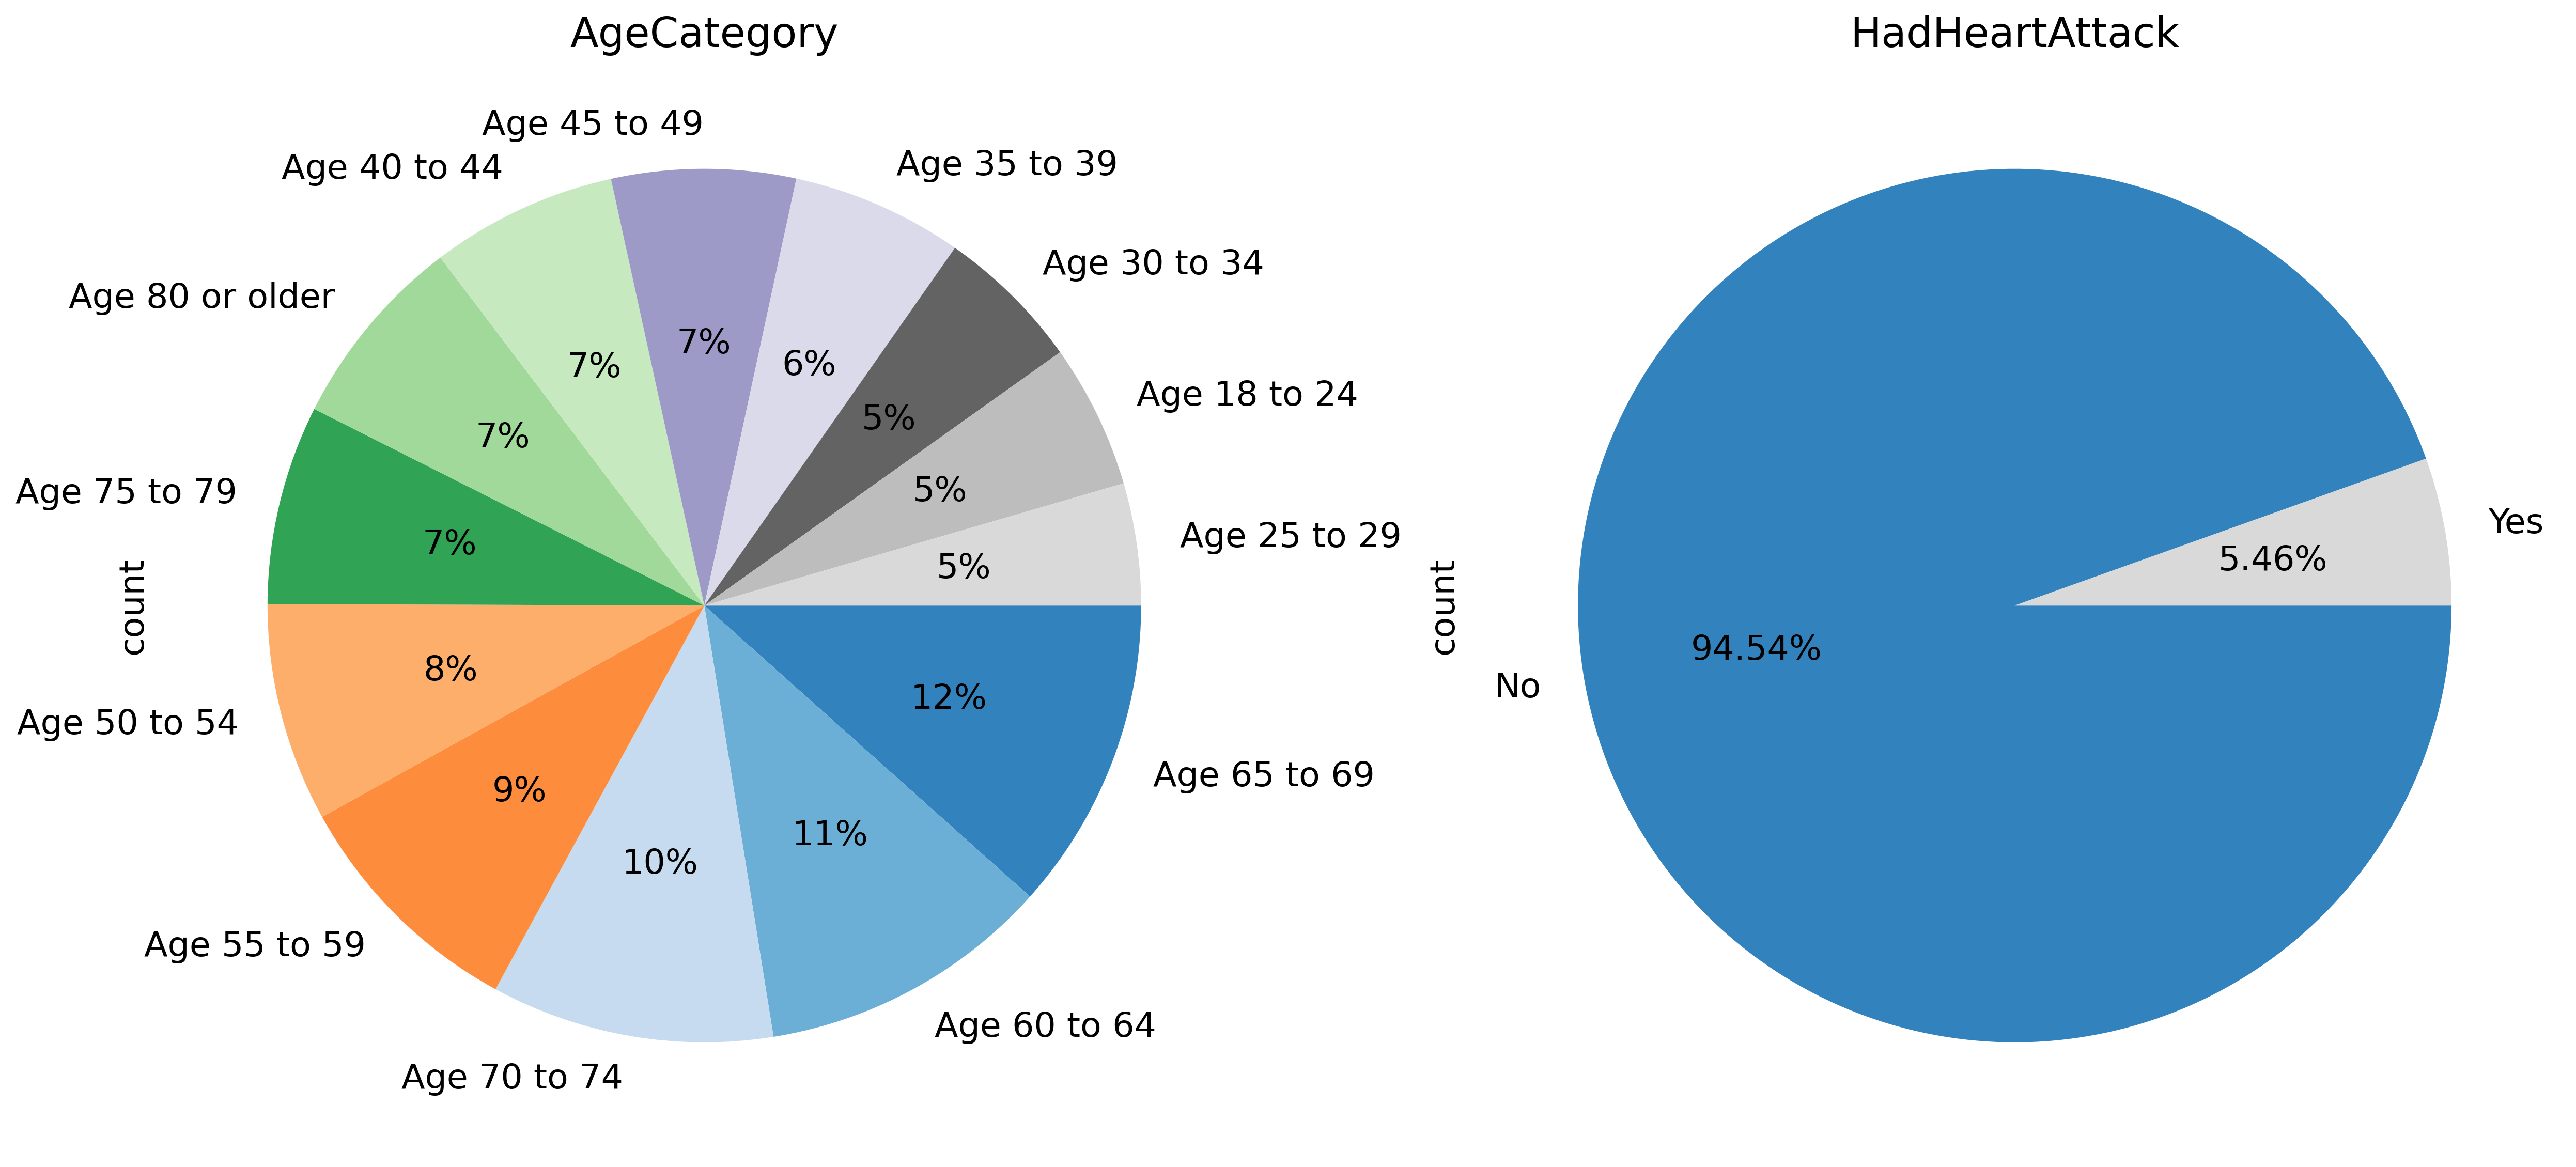

In [22]:
# Some of the ategorical feature distributions (mostly demographic and some important features)
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(20,15), dpi=300)
r, c = 1, 2
cmap = plt.cm.tab20c
# ax = plt.subplot(r,c,1)
# df["Sex"].value_counts().plot.pie(cmap = cmap, title = "Sex", autopct = '%.2f%%', counterclock=False, ax=ax)
# ax = plt.subplot(r,c,2)
# df["RaceEthnicityCategory"].value_counts().plot.pie(cmap = cmap, title = "RaceEthnicityCategory", autopct = '%.2f%%', counterclock=False, ax=ax)
# ax = plt.subplot(r,c,1)
# df["LastCheckupTime"].value_counts().plot.pie(cmap = cmap, title = "LastCheckupTime", autopct = '%.2f%%', counterclock=False, ax=ax)
ax = plt.subplot(r,c,2)
df["HadHeartAttack"].value_counts().plot.pie(cmap = cmap, title = "HadHeartAttack", autopct = '%.2f%%', counterclock=False, ax=ax)
# ax = plt.subplot(r,c,5)
# df["GeneralHealth"].value_counts().plot.pie(cmap = cmap, title = "GeneralHealth", autopct = '%.2f%%', counterclock=False, ax=ax)
ax = plt.subplot(r,c,1)
df["AgeCategory"].value_counts().plot.pie(cmap = cmap, title = "AgeCategory", autopct = '%.0f%%', counterclock=False, ax=ax)

In [23]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [24]:
# Check empty string
def is_empty(x):
    return x.eq('').any()

df.apply(lambda x: is_empty(x))

State                        False
Sex                          False
GeneralHealth                False
PhysicalHealthDays           False
MentalHealthDays             False
LastCheckupTime              False
PhysicalActivities           False
SleepHours                   False
RemovedTeeth                 False
HadHeartAttack               False
HadAngina                    False
HadStroke                    False
HadAsthma                    False
HadSkinCancer                False
HadCOPD                      False
HadDepressiveDisorder        False
HadKidneyDisease             False
HadArthritis                 False
HadDiabetes                  False
DeafOrHardOfHearing          False
BlindOrVisionDifficulty      False
DifficultyConcentrating      False
DifficultyWalking            False
DifficultyDressingBathing    False
DifficultyErrands            False
SmokerStatus                 False
ECigaretteUsage              False
ChestScan                    False
RaceEthnicityCategor

array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'WeightInKilograms'}>],
       [<Axes: title={'center': 'HeightInMeters'}>,
        <Axes: title={'center': 'SleepHours'}>],
       [<Axes: title={'center': 'MentalHealthDays'}>,
        <Axes: title={'center': 'PhysicalHealthDays'}>]], dtype=object)

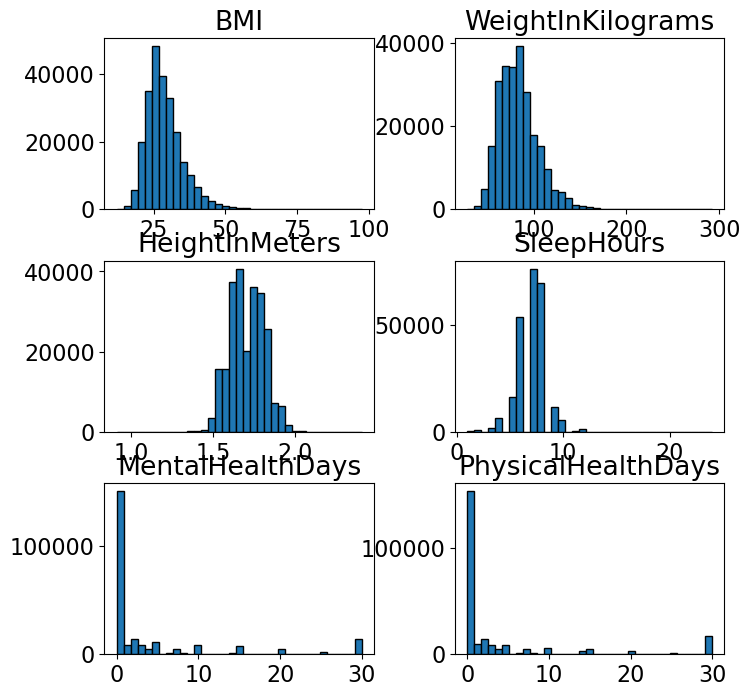

In [25]:
df[["BMI","WeightInKilograms","HeightInMeters", "SleepHours","MentalHealthDays", "PhysicalHealthDays"]].hist(bins=35, grid=False, edgecolor="black", figsize=(8,8))

In [26]:
# transform categorical columns to pandas categorical data type
for cname in df.select_dtypes("object").columns:
    df[cname] = df[cname].astype("category")
df["State"]

0                Alabama
1                Alabama
2                Alabama
3                Alabama
4                Alabama
               ...      
246017    Virgin Islands
246018    Virgin Islands
246019    Virgin Islands
246020    Virgin Islands
246021    Virgin Islands
Name: State, Length: 246022, dtype: category
Categories (54, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

### correlation between the numerical features
We can see that BMI has strong positive correlation with weight, which is expected since BMI is calculated as "the person's weight in kilograms divided by the square of height in meters". We can also see that the weight is positively correlated with height because in general a person's weight and height increase together.

<Axes: >

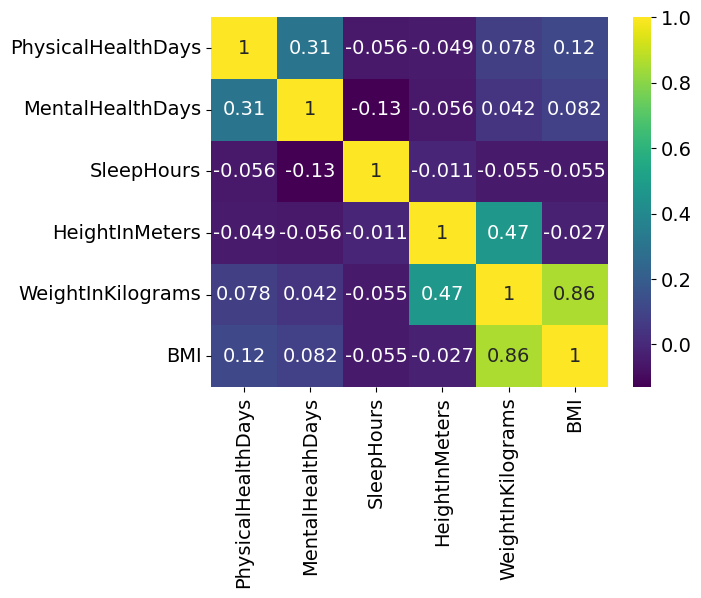

In [28]:
# correlation between the numerical features
plt.rcParams.update({'font.size': 14})
import seaborn as sns
cor = df.select_dtypes("float").corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.viridis)

### Convert categorical to numeric
Next we want to convert all the nomial categorical data to use one-hot encoding, and all the ordinal categorical data to use ordinal encoding method to preserve order. We need to manually determine which columns are nomial/ordinal.

In [30]:
nominal_names = ['State', 'Sex', 'PhysicalActivities','HadHeartAttack','HadAngina','HadStroke','HadAsthma','HadSkinCancer', 'HadCOPD'
                 ,'HadDepressiveDisorder','HadKidneyDisease','HadArthritis','HadDiabetes','DeafOrHardOfHearing','BlindOrVisionDifficulty'
                 ,'DifficultyConcentrating','DifficultyWalking','DifficultyDressingBathing','DifficultyErrands','ChestScan','RaceEthnicityCategory'
                 ,'AlcoholDrinkers', 'HIVTesting','FluVaxLast12','PneumoVaxEver','TetanusLast10Tdap','HighRiskLastYear','CovidPos']
ordinal_names = ['GeneralHealth', 'LastCheckupTime', 'RemovedTeeth','SmokerStatus','ECigaretteUsage','AgeCategory']
assert len(nominal_names) + len(ordinal_names) == len(df.select_dtypes("category").columns)

In [31]:
noms = pd.get_dummies(df[nominal_names], dtype=pd.UInt8Dtype())
df = df.drop(nominal_names, axis=1).join(noms)

In [38]:
general_health_mapper = {'Excellent': 4,'Very good': 3, 'Good': 2, 'Fair': 1, 'Poor': 0}
lastcheckup_mapper = {'Within past year (anytime less than 12 months ago)': 3, 'Within past 2 years (1 year but less than 2 years ago)': 2
                      ,'Within past 5 years (2 years but less than 5 years ago)': 1, '5 or more years ago': 0}
removed_teeth_mapper = {'None of them': 3, '1 to 5': 2, '6 or more, but not all': 1, 'All': 0}
somker_status_mapper = {'Never smoked': 3, 'Former smoker': 2, 'Current smoker - now smokes some days': 1
                        , 'Current smoker - now smokes every day': 0}
ecigar_mapper = {'Never used e-cigarettes in my entire life': 3, 'Not at all (right now)': 2, 'Use them some days': 1,
                 'Use them every day': 0}
age_mapper = {
    "Age 18 to 24": 12,
    "Age 25 to 29": 11,
    "Age 30 to 34": 10,
    "Age 35 to 39": 9,
    "Age 40 to 44": 8,
    "Age 45 to 49": 7,
    "Age 50 to 54": 6,
    "Age 55 to 59": 5,
    "Age 60 to 64": 4,
    "Age 65 to 69": 3,
    "Age 70 to 74": 2,
    "Age 75 to 79": 1,
    "Age 80 or older": 0
}
mappers = [general_health_mapper, lastcheckup_mapper, removed_teeth_mapper, somker_status_mapper, ecigar_mapper, age_mapper]

In [39]:
for i, cname in enumerate(ordinal_names):
    df[cname] = df[cname].replace(mappers[i])

Now we have all the categorical value converted to numeric (nominal is pd.UInt8Dtype, ordinal is in pandas category, and numeric is in float)

In [40]:
df.head()

,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,SleepHours,RemovedTeeth,SmokerStatus,ECigaretteUsage,AgeCategory,HeightInMeters,...,PneumoVaxEver_Yes,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_No,HighRiskLastYear_Yes,CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,0,4.0,0.0,3,9.0,3,2,3,3,1.60,...,1,0,1,0,0,1,0,1,0,0
1,0,0.0,0.0,3,6.0,3,2,3,2,1.78,...,1,0,0,1,0,1,0,1,0,0
2,0,0.0,0.0,3,8.0,1,2,3,1,1.85,...,1,1,0,0,0,1,0,0,0,1
3,2,5.0,0.0,3,9.0,3,3,3,0,1.70,...,1,1,0,0,0,1,0,0,0,1
4,3,3.0,15.0,3,5.0,2,3,3,0,1.55,...,1,1,0,0,0,1,0,1,0,0


With the converted ordinal values, we can visualize their correlation:

<Axes: >

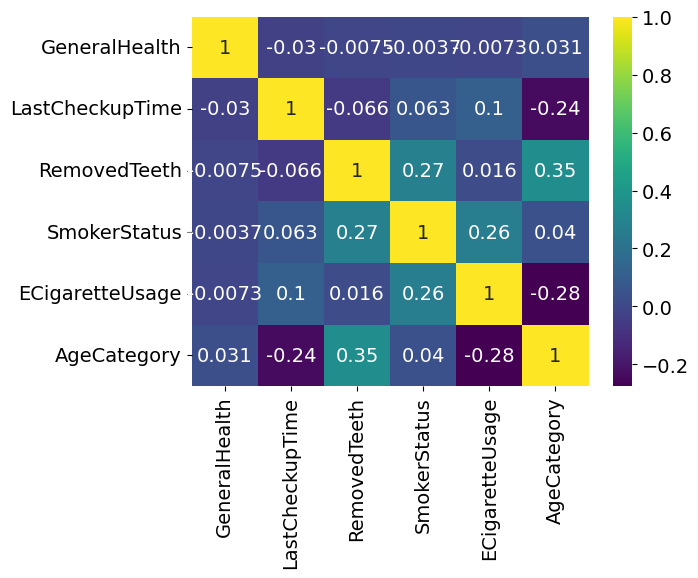

In [41]:
all_cor = df.select_dtypes("category").corr()
sns.heatmap(all_cor, annot=True, cmap=plt.cm.viridis)